In [152]:
%matplotlib notebook
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import matplotlib
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from rasterio import features
from Map_Tools import map_elements as me
# from matplotlib.patches import BoxStyle

import geopandas as gpd
from matplotlib import colors
# import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.gridspec import GridSpec

G_Drive = 'C:\\Users\\User\\Google Drive\\'

Save_Plots=G_Drive+'PhD_Thesis\\Chapter3_Figs/'


Projected_Image = 'temp/FI_Projected.tif'


FI_Poly= gpd.read_file(G_Drive+'SiteInfo\\FishIsland_Poly.shp')
BL_Poly= gpd.read_file(G_Drive+'SiteInfo\\BigLake.shp')

pt=gpd.read_file(G_Drive+'FishIsland_Outputs\Classification/Points.shp')
# print(pt)
POI = pt.to_crs(FI_Poly.crs)
POI.crs


   id         Name        Label                     geometry
0   1   EC Station           EC  POINT (-134.88098 69.37234)
1  99  Taglu Tower  Taglu Tower  POINT (-134.88782 69.37103)
2  68           S1           S1  POINT (-134.88132 69.37227)
3  69           PS           PS  POINT (-134.88115 69.37226)
4  99           S2           S2  POINT (-134.88121 69.37219)
5  56           S3           S3  POINT (-134.88120 69.37210)
6  96          AWS          AWS  POINT (-134.88210 69.37219)


<Projected CRS: EPSG:32608>
Name: WGS 84 / UTM zone 8N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 138°W and 132°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territiories (NWT); Yukon. United States (USA) - Alaska (AK).
- bounds: (-138.0, 0.0, -132.0, 84.0)
Coordinate Operation:
- name: UTM zone 8N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

uint8
255
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 2346, 'height': 1616, 'count': 11, 'crs': CRS.from_epsg(32608), 'transform': Affine(500.0, 0.0, 29500.0,
       0.0, -500.0, 8053500.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
[[0.         0.         0.         ... 0.43678161 0.56321839 0.54022989]
 [0.         0.         0.         ... 0.44827586 0.32183908 0.3908046 ]
 [0.         0.         0.         ... 0.42528736 0.16091954 0.22988506]
 ...
 [0.3908046  0.44827586 0.89655172 ... 0.50574713 0.50574713 0.51724138]
 [0.65517241 0.77011494 1.         ... 0.51724138 0.55172414 0.51724138]
 [1.         1.         0.86206897 ... 0.54022989 0.56321839 0.57471264]]


C:\Users\User\AppData\Local\Temp/ipykernel_24928/1207021930.py:64: RuntimeWarning: invalid value encountered in true_divide
  NDVI = (B5-B4)/(B5+B4)


<IPython.core.display.Javascript object>


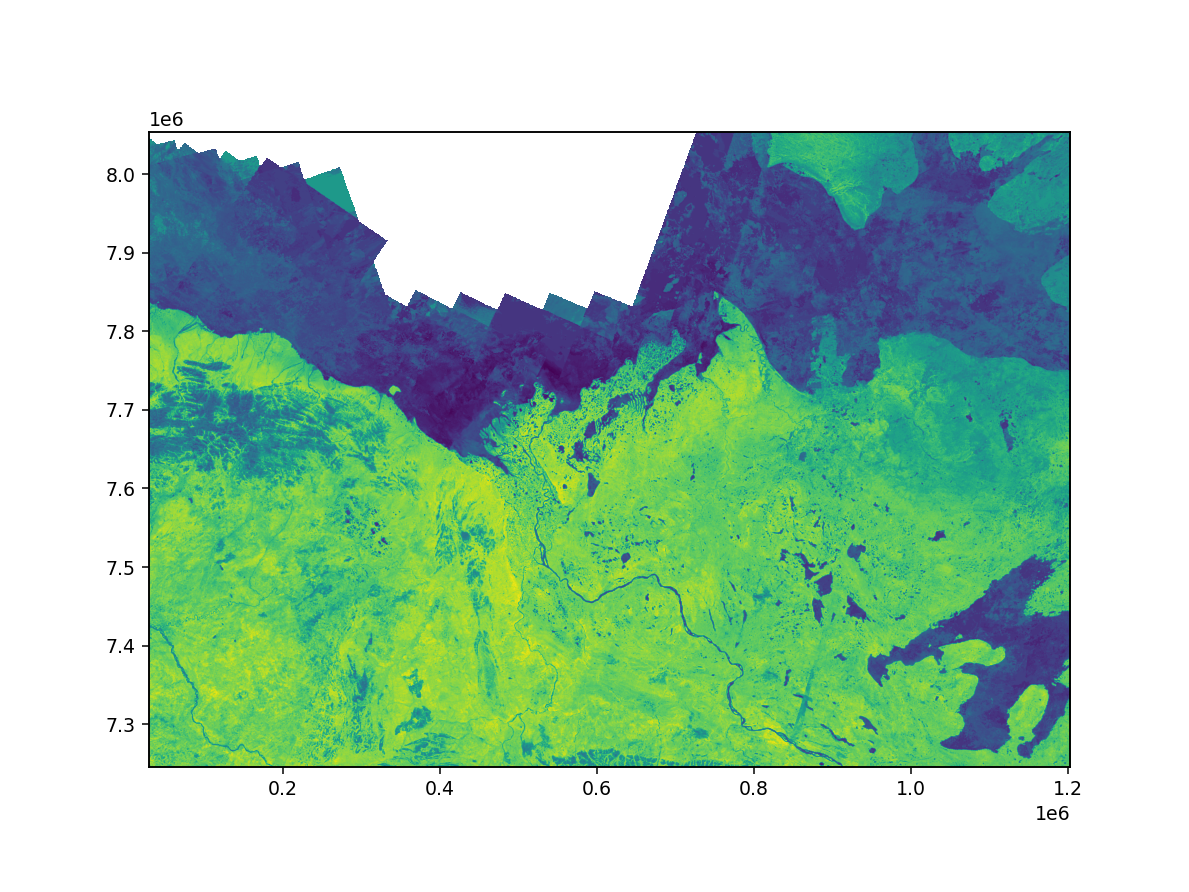

[[[        nan         nan         nan ... -0.06748466 -0.0095452
    0.02050664]
  [        nan         nan         nan ... -0.07265522 -0.09433962
   -0.08451758]
  [        nan         nan         nan ... -0.09878214 -0.29608938
   -0.1262136 ]
  ...
  [ 0.16905445  0.12051077  0.2348285  ...  0.20547946  0.23268482
    0.24328473]
  [ 0.30120483  0.28777364  0.33333334 ...  0.27158555  0.33025405
    0.30120483]
  [ 0.36708862  0.54285717  0.44230768 ...  0.29160306  0.33940774
    0.3196481 ]]]


In [200]:
def pct_clip(array,pct=[10,95]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=0
    return clip
FC = 1

with rio.open(G_Drive+'earthengine/False_Color_Landsat.tif') as src:
#     print(src.dtypes[0])
    print(src.dtypes[0])
    print(src.read(4).max())
    print(src.profile)
    with rio.open(
            'temp/False_Color_Temp.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
#         print(src.read(5))
        V = pct_clip(src.read(4+FC))
        dst.write(V,1)
        V = pct_clip(src.read(3+FC))
        dst.write(V,2)
        V = pct_clip(src.read(2+FC))
        dst.write(V,3)
    FC = 0
    with rio.open(
            'temp/True_Color_Temp.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
#         print(src.read(5))
        V = pct_clip(src.read(4+FC))
        dst.write(V,1)
        V = pct_clip(src.read(3+FC))
        dst.write(V,2)
        V = pct_clip(src.read(2+FC))
        dst.write(V,3)
    

# with rio.open(G_Drive+'earthengine/False_Color_Landsat.tif') as src:
    with rio.open(
            'temp/NDVI_Temp.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=1,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
        B5 = pct_clip(src.read(5),pct=[1,99])
        B4 = pct_clip(src.read(4),pct=[1,99])
        NDVI = (B5-B4)/(B5+B4)
        print(B5)
        dst.write(NDVI,1)
#         dst.write(V,2)
#         V = pct_clip(src.read(2+FC))
#         dst.write(V,3)
    
    
fig,ax=plt.subplots()
with rio.open("temp/NDVI_Temp.tif") as src2:
    print(src2.read())
    show(src2.read(),transform=src2.transform,ax=ax)

In [162]:
with rio.open(Projected_Image) as src:
    Im = src.read()
    params = src.profile
    Transform = src.transform
    NDVI = Im.max(axis=0)
    Mask = NDVI.copy()
    Mask[Mask<0.3]=0
    Mask[Mask>=0.3]=1
    
    Mask2= Mask.copy()
    Mask2[Mask2==0]=np.nan
    
    results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            features.shapes(Mask, mask=None, transform=src.transform)))
    
    
geoms = list(results)
Temp = gpd.GeoDataFrame.from_features(geoms)
Water = Temp.loc[Temp['raster_val']<1].copy()#
Water.loc[((Water['raster_val']>0.5)&(Water.area<1e6)),'raster_val']=np.nan
Bad = Water[Water.geometry.is_valid==False].buffer(0)
Water.loc[Water.geometry.is_valid==False,'geometry']=Bad.geometry
Water = Water.dropna().dissolve()

# fig,ax=plt.subplots()
# Water.plot(ax=ax)



In [155]:

BLDP = BL_Poly.dissolve()

BLDP['Id']+=1
import pprint

shapes = ((geom,value) for geom,value in zip (BLDP['geometry'],BLDP['Id']))
# print(Polys.groupby('Code').sum().area)
with rio.open('temp/BLDP.tif','w+',**params) as out:
    out_arr=out.read(1)
    Image=features.rasterize(shapes=shapes,fill=-9999,out=out_arr,transform=Transform)
    Image = (Image+1) * Mask
    out.write(Image,1)
    results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            features.shapes(Image, mask=None, transform=src.transform)))

Filter = 1e5
    
geoms = list(results)
Temp = gpd.GeoDataFrame.from_features(geoms)
BLDP_Inv = Temp.loc[Temp['raster_val']>0].copy()#
BLDP_Inv.loc[((BLDP_Inv['raster_val']>0.5)&(BLDP_Inv.area<Filter)),'raster_val']=np.nan
BLDP_Inv.loc[((BLDP_Inv['raster_val']>1)),'raster_val']=np.nan
Bad = BLDP_Inv[BLDP_Inv.geometry.is_valid==False].buffer(0)
BLDP_Inv.loc[BLDP_Inv.geometry.is_valid==False,'geometry']=Bad.geometry
BLDP_Inv = BLDP_Inv.dropna().dissolve(by='raster_val')


BLDP = Temp.loc[Temp['raster_val']>1].copy()#
BLDP.loc[((BLDP['raster_val']>1)&(BLDP.area<Filter)),'raster_val']=np.nan
# BLDP_Inv.loc[((BLDP_Inv['raster_val']>1)),'raster_val']=np.nan
Bad = BLDP[BLDP.geometry.is_valid==False].buffer(0)
BLDP.loc[BLDP.geometry.is_valid==False,'geometry']=Bad.geometry
BLDP = BLDP.dropna().dissolve(by='raster_val')

BLDP

,geometry
raster_val,
2.0,"MULTIPOLYGON (((503420.754 7683945.767, 503449..."


# BLDP Mask

<IPython.core.display.Javascript object>


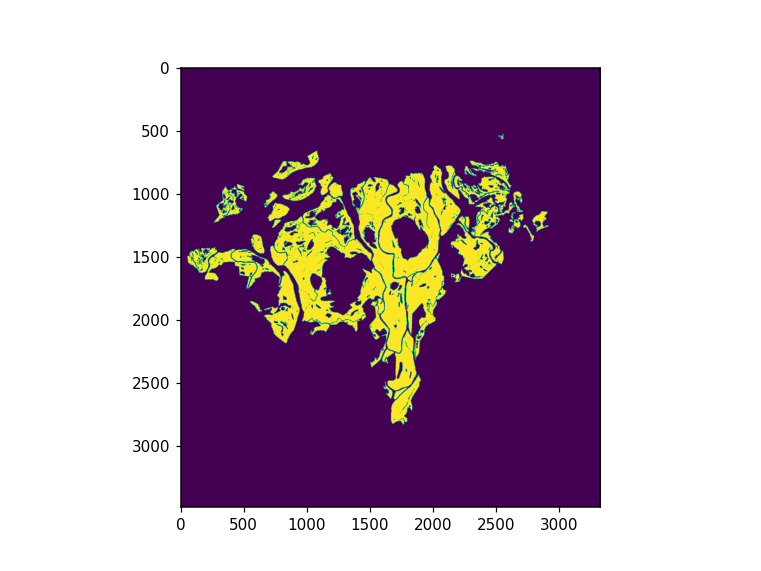

In [191]:
fig,ax=plt.subplots()
BLP = params.copy()
BLP['count']=1
with rio.open('temp/BLDP_Mask.tif','w+',**BLP) as out:
    out_arr=out.read(1)
    shapes = ((geom,value) for geom,value in zip (BLDP['geometry'],[1]))
    Image=features.rasterize(shapes=shapes,fill=-9999,out=out_arr,transform=Transform)
    out.write(Image,1)
# print(BLP)
    show(Image)

In [101]:
rivers = gpd.read_file(G_Drive+'NorthernCan\\shapefiles\\LCC_NAD83/hydro_rivers_l.shp')
rivers = rivers.to_crs(FI_Poly.crs)
rivers = rivers.buffer(1e2)


land = gpd.read_file(G_Drive+'NorthernCan\\shapefiles\\LCC_NAD83/hydro_land_p.shp')
land = land.to_crs(FI_Poly.crs)
land = land.loc[land['FEAT_E']=='land']

# land.FEAT_E.unique()

<IPython.core.display.Javascript object>


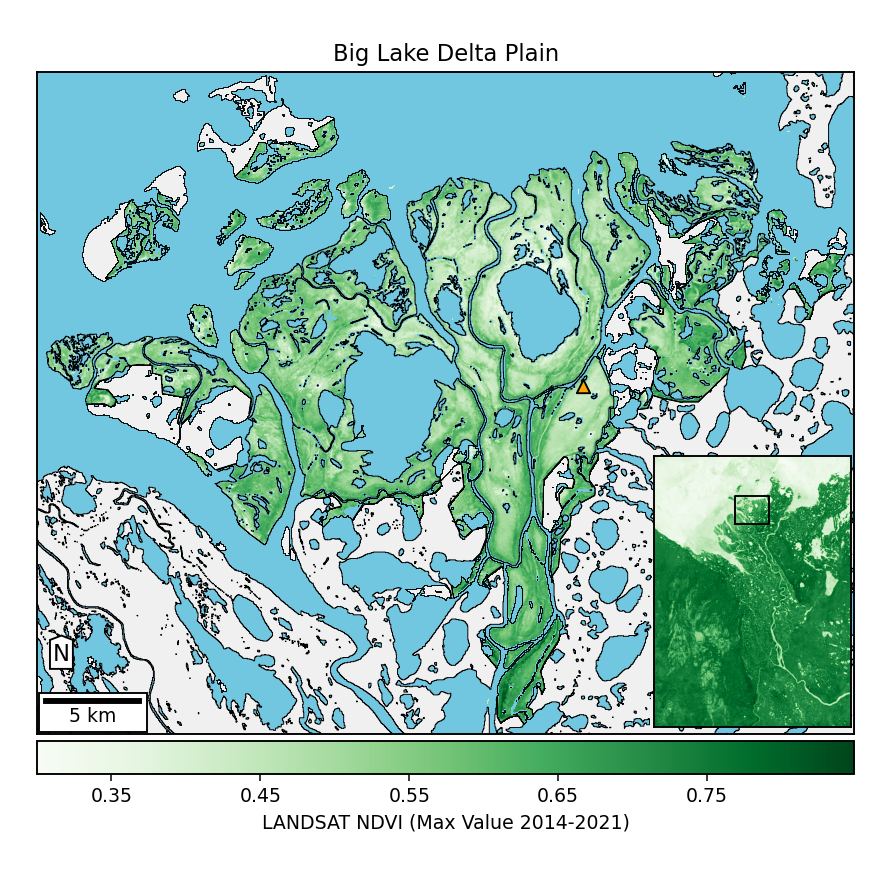

In [199]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1 #set the value globally



fig,ax = plt.subplots(figsize=(4.75,4.75))

CL = ['#d9fffe','#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
cmap = colors.ListedColormap(CL)
bounds = [-1,0.3,0.4,0.5,0.6,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

retted=show(Im.max(axis=0)*Mask2,ax=ax,cmap='Greens',
#retted=show(Im.max(axis=0),ax=ax,cmap=cmap,norm=norm,
            transform=Transform)
im = retted.get_images()[0]
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax,
                    ticks=[0.35,0.45,0.55,.65,0.75],
                    orientation='horizontal',label='LANDSAT NDVI (Max Value 2014-2021)')

buff=5e2
xb = [BLDP.bounds['minx'].values[0]-buff,BLDP.bounds['maxx'].values[0]+buff]
yb = [BLDP.bounds['miny'].values[0]-buff,BLDP.bounds['maxy'].values[0]+buff]
ax.set_xlim(xb)
ax.set_ylim(yb)
# ax.set_ylim()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Big Lake Delta Plain')

BLDP_Inv.plot(ax=ax,color='#f0f0f0',edgecolor='k',linewidth=.5)#,hatch="/")

BLDP.plot(ax=ax,color='None',edgecolor='k',linewidth=.5)#,hatch="/")

kwargs = {'facecolor':'#f0f0f0',
                 'edgecolor':'k',
                 'linewidth':0.15,
#                  'label':l
         }
axins = ax.inset_axes([0.7, 0.01, 0.35, 0.41])
# land.plot(ax=axins,**kwargs)


with rio.open('temp/NDVI_Temp.tif') as src2:
    FC = src2.read()
    show(FC,ax=axins,transform=src2.transform,cmap='Greens')

x_scale=1e5
y_scale2=5e4
y_scale1=2.5e5


xbins = [xb[0]-x_scale,xb[1]+x_scale]
ybins = [yb[0]-y_scale1,yb[1]+y_scale2]
axins.set_xlim(xbins)
axins.set_ylim(ybins)


XB = [xb[0],xb[0],xb[1],xb[1],xb[0]]
YB = [yb[0],yb[1],yb[1],yb[0],yb[0]]

ax.set_facecolor('#72c7e0')

POI.loc[POI['Label']=='EC'].plot(ax=ax,marker='^',color='orange',edgecolor='k',markersize=50)

axins.plot(XB,YB,color='k',linewidth=1)

axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)


me.scalebar(ax,distance=5e3,label='5 km')

me.North_Arrow(ax,x=0.03,y=0.12)


# FI_Style = {'facecolor':'None',
#             'edgecolor':'k',
#             'linestyle':'--',
#             'linewidth':2}

# FI_Poly.plot(ax=ax,**FI_Style)

plt.tight_layout()
plt.savefig(Save_Plots+'Greenest_Pixel.png',dpi=600)


In [154]:
# with rio.open('temp/False_Color_Temp.tif') as src:
#     FC = src.read()#[2,3,4])
#     params = src.profile
#     Transform = src.transform
#     plt.figure()
#     show(FC)
Lat = 69+ 25/60+23/3600
Lon = -135+ 55/3600

import pandas as pd
KP = pd.DataFrame(data = {'Name':['KULUARPAK'],
                         'Lat':[Lat],
                         'Lon':[Lon]})

KP = gpd.GeoDataFrame(
                    KP,
                    geometry=gpd.points_from_xy(KP.Lon, KP.Lat),
                    crs='WGS1984'
                        )
KP = KP.to_crs(POI.crs)

Temp = POI.loc[POI['Label']=='EC']#.crs
print(KP)
print(Temp)
# Temp = Temp.to_crs(KP.crs)
Temp
KP.distance(Temp)

# print(KP,Temp)
# POI = POI.loc[POI.id!=0]
# POI.loc[7] = [0,KP.Name[0],'KP',KP.geometry[0]]
# POI.loc[POI['id']<2]
# POI
# KP.crs

        Name        Lat         Lon                        geometry
0  KULUARPAK  69.423056 -134.984722  POINT (500599.263 7701535.986)
   id        Name Label                        geometry
0   1  EC Station    EC  POINT (504679.301 7695885.734)


0    6969.365347
dtype: float64